In [1]:
import geemap
import ee
import folium
import geopandas as gpd

In [2]:
Map = geemap.Map()

esa = ee.ImageCollection("ESA/WorldCover/v100").first()
esa_vis = {'bands': ['Map']}

Map.addLayer(esa, esa_vis, "ESA Land Cover")
Map.add_legend(title="ESA Land Cover", builtin_legend='ESA_WorldCover')

Map


Successfully saved authorization token.


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [18]:
datadir = 'C:/Users/jtrum/world_bank/data/'

# Define the path to your GeoJSON file
aoi_path = datadir + 'luanda2clean.geojson'

# Load the GeoJSON as a Feature
aoi = geemap.geojson_to_ee(aoi_path)

# Create a map
Map = geemap.Map()
#choose a different basemap
Map.add_basemap('CartoDB.DarkMatter')

# Load the ESA Land Cover data
esa = ee.ImageCollection("ESA/WorldCover/v100").first()

# Filter the data to your AOI
esa = esa.clip(aoi)

esa_vis = {'bands': ['Map']}

# Add the ESA Land Cover layer to the map
Map.addLayer(esa, esa_vis, "ESA Land Cover")

# Add a legend to the map
Map.add_legend(title="ESA Land Cover", builtin_legend='ESA_WorldCover')
#customize colors in the legend
Map.add_legend(colors=[("#FF0000",), ("#008000",), ("#0000FF",), ("#FFFF00",), ("#800080",), ("#FFA500",), ("#FFC0CB",), ("#A52A2A",), ("#808080",), ("#00FFFF",), ("#FF00FF",)])

#start the zoom at the center of the AOI
Map.centerObject(aoi, 10)



# Display the map
Map


%x format: an integer is required, not str
The legend keys and values must be the same length.


Map(center=[-8.980207755364754, 13.310742868350161], controls=(WidgetControl(options=['position', 'transparent…

In [35]:
df = geemap.image_area_by_group(esa, scale=1000, denominator=1e6, decimal_places=4, verbose=True)

Calculating area for group 10 ...
Calculating area for group 20 ...
Calculating area for group 30 ...
Calculating area for group 40 ...
Calculating area for group 50 ...
Calculating area for group 60 ...
Calculating area for group 80 ...
Calculating area for group 90 ...
Calculating area for group 95 ...


In [36]:
df.dtypes

area          float64
percentage    float64
dtype: object

In [37]:
df['percentage'] = df['percentage']*100

# reset the index and rename the columns to be the name of the Land Cover Type
df = df.reset_index().rename(columns={'group': 'type'})


# Create a mapping dictionary with numbers as strings
type_mapping = {
    '10': 'Trees',
    '20': 'Shrublands',
    '30': 'Grasslands',
    '40': 'Croplands',
    '50': 'Built-Up',
    '60': 'Barren',
    '70': 'Snow and Ice',
    '80': 'Water Bodies',
    '90': 'Herbaceous Wetlands',
    '95': 'Mangroves',
    '100': 'Moss and Lichen'
}

# Use the mapping dictionary to replace values in the 'type' column
df['type'] = df['type'].replace(type_mapping)
df
                                

,type,area,percentage
0,Trees,42.6993,1.75
1,Shrublands,10.7903,0.44
2,Grasslands,1460.9425,59.87
3,Croplands,6.7740,0.28
4,Built-Up,505.1714,20.70
5,Barren,135.6323,5.56
6,Water Bodies,37.0484,1.52
7,Herbaceous Wetlands,195.5900,8.02
8,Mangroves,45.3820,1.86


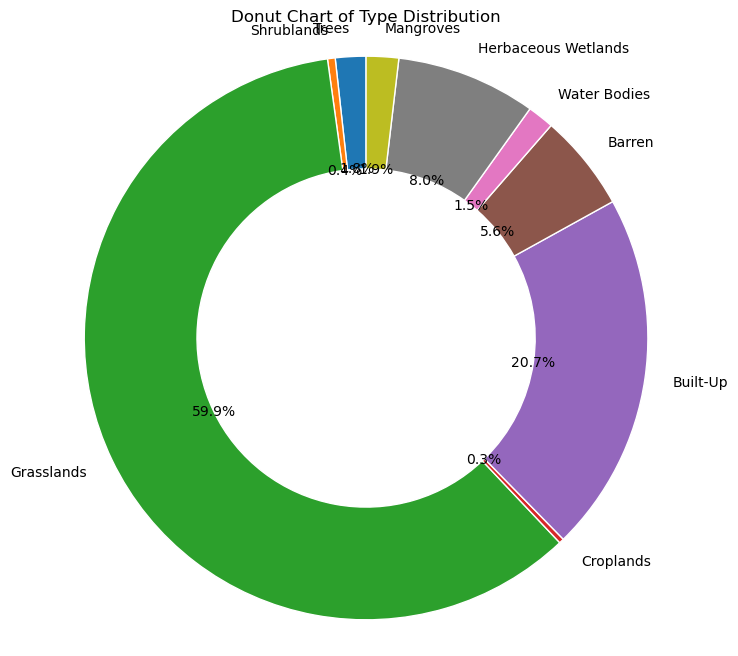

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(df['percentage'], labels=df['type'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add a circle in the center to make it a donut chart
circle = plt.Circle((0, 0), 0.3, color='white')
plt.gca().add_artist(circle)

# Set aspect ratio to equal to ensure a circular chart
plt.axis('equal')

# Add a title
plt.title('Donut Chart of Type Distribution')
plt.show;
# Show the chart